# Raster Data Analysis

In [1]:
# Import necessary libraries
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

This notebook outlines the process of analyzing raster data to identify areas with values above a certain threshold.First stom is Hurricane Ida, the second one is August 2016 (while repeating code).

Mean value: 0.0011660822812130014
Standard Deviation: 0.04138442729189011
Minimum value: -2.3501973152160645
Maximum value: 4.074807643890381


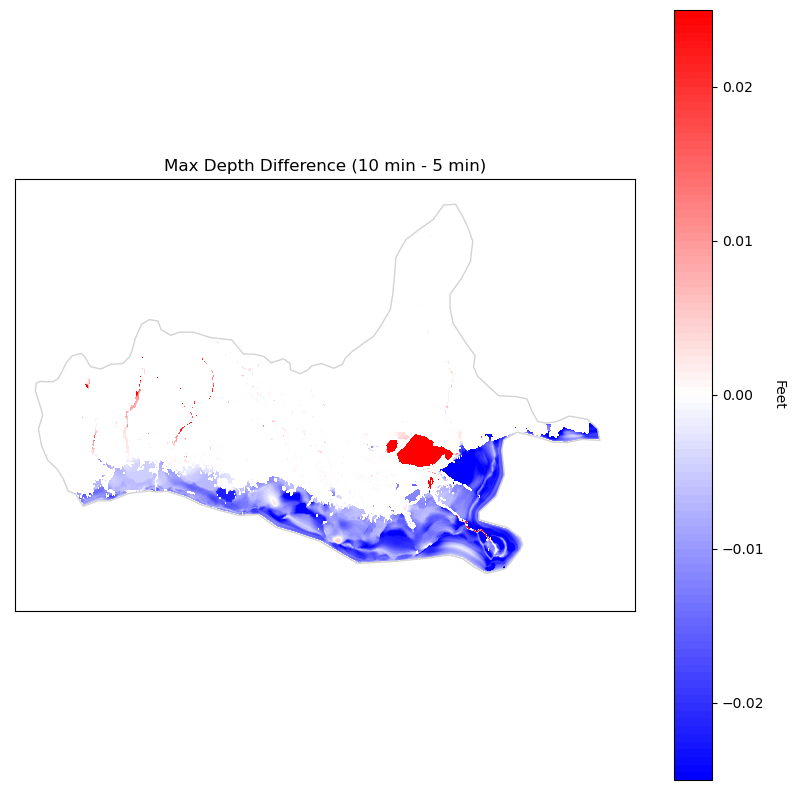

In [7]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_path = r"S:\For_Angshuman\LWI_Coastwide\Raster_Output\10minus5min.all_regions_v20240108_6m_COG.All_Regions_v20240108_6m_EPSG6479_ft_COG.tif"
shapefile_path = r"S:\For_Angshuman\LWI_Coastwide\Raster_Output\Domain_Extent\Perimeter\v20240131\Perimeter_v20240131.shp"
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

masked_array = np.ma.masked_invalid(out_image)
mean_value = np.ma.mean(masked_array)
std_dev = np.ma.std(masked_array)
min_value = np.ma.min(masked_array)
max_value = np.ma.max(masked_array)

print(f"Mean value: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (10 min - 5 min)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


Open the raster file and read the data into a NumPy array.

## Step 3: Analyze the Data

Mean value: 0.0011660822812130014
Standard Deviation: 0.04138442729189011
Minimum value: -2.3501973152160645
Maximum value: 4.074807643890381


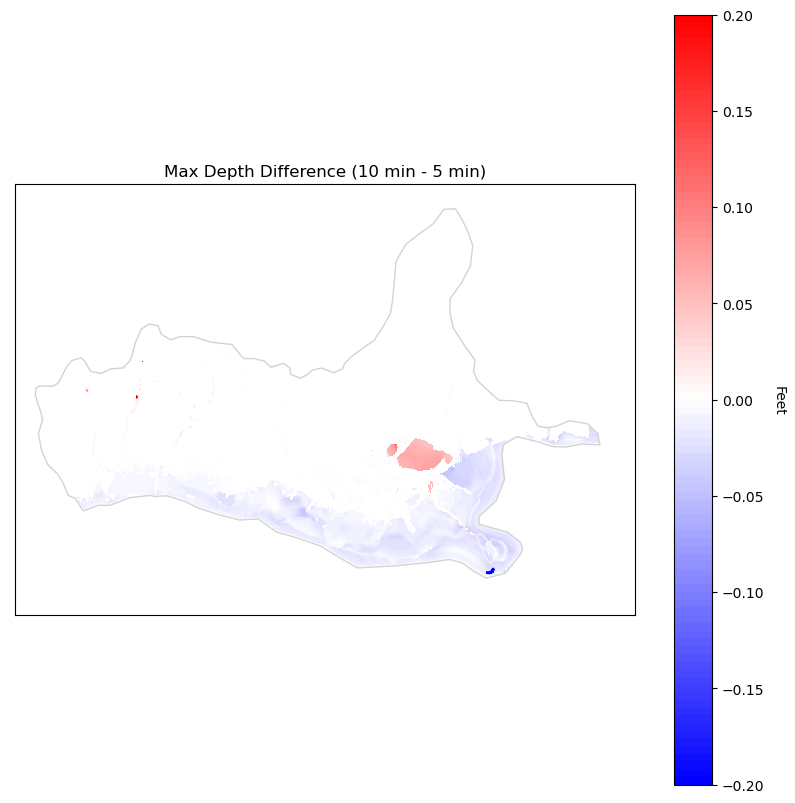

In [19]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

masked_array = np.ma.masked_invalid(out_image)
mean_value = np.ma.mean(masked_array)
std_dev = np.ma.std(masked_array)
min_value = np.ma.min(masked_array)
max_value = np.ma.max(masked_array)

print(f"Mean value: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.2, vmax=0.2)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (10 min - 5 min)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


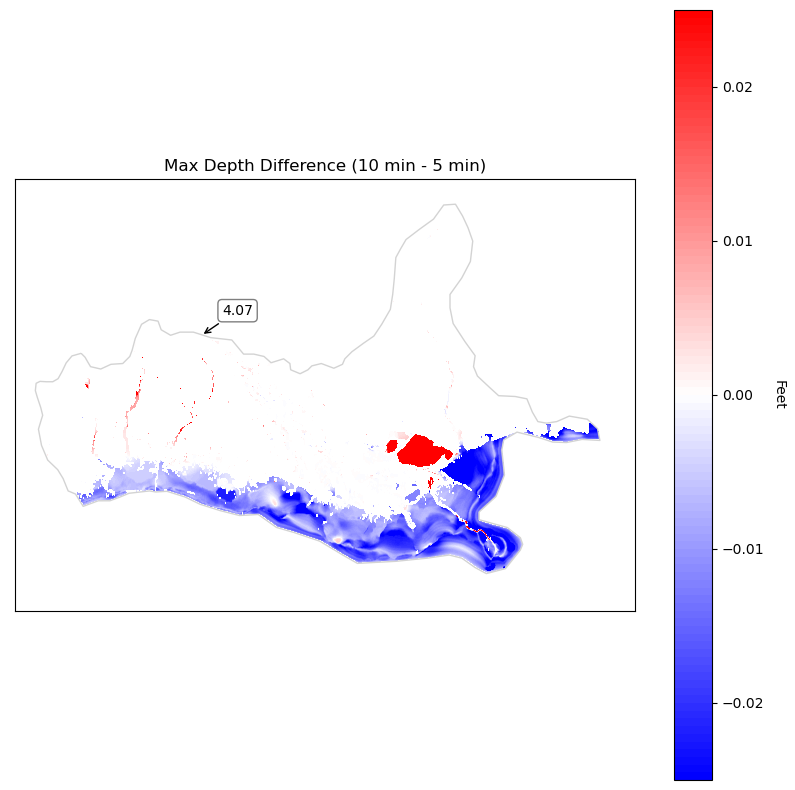

In [9]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the value and index of the highest pixel
max_value = np.nanmax(out_image)
max_index = np.unravel_index(np.nanargmax(out_image), out_image.shape)

# Convert the row, column index of the max value to coordinates
max_coords = rasterio.transform.xy(out_transform, max_index[0], max_index[1], offset='center')

# Round the max value for display with two decimal places
rounded_max_value = "{:.2f}".format(max_value)

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the maximum value
plt.annotate(rounded_max_value, 
             xy=max_coords, 
             xycoords='data',
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5))

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (10 min - 5 min)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


In [47]:
!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


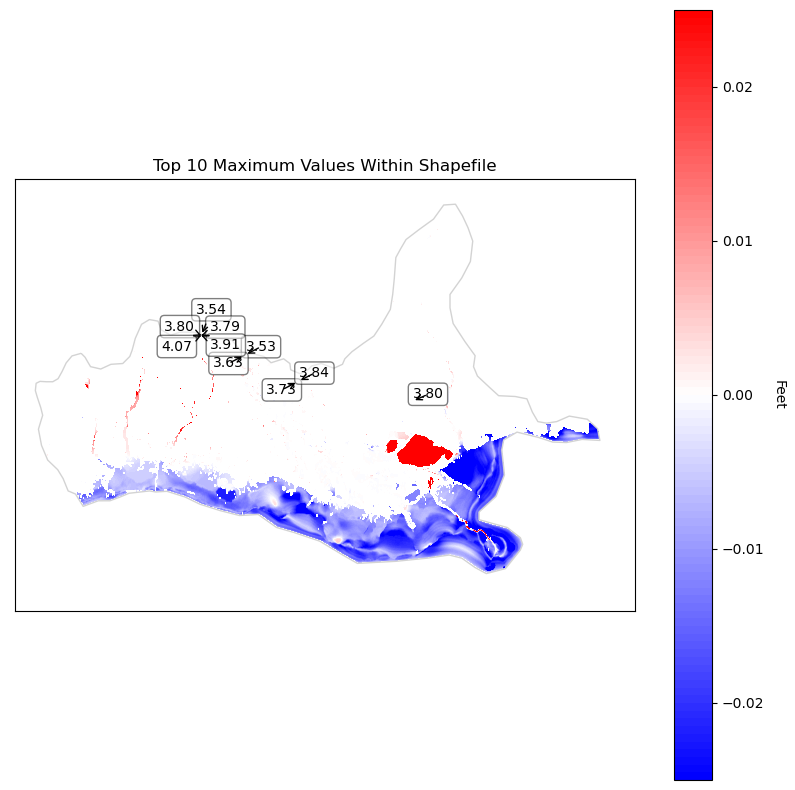

In [10]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the indices of all finite values inside the shapefile boundary
finite_indices = np.argwhere(np.isfinite(out_image))

# Get the corresponding values
finite_values = out_image[finite_indices[:, 0], finite_indices[:, 1]]

# Find the top 10 values and their indices
top_indices = np.argpartition(finite_values, -10)[-10:]
top_values = finite_values[top_indices]
top_finite_indices = finite_indices[top_indices]

# Convert 2D indices to coordinates
coords_top10 = [rasterio.transform.xy(out_transform, *idx, offset='center') for idx in top_finite_indices]

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the top 10 values
texts = []
for value, (x, y) in zip(top_values, coords_top10):
    texts.append(
        plt.text(
            x, y, f"{value:.2f}",
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
        )
    )

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Top 10 Maximum Values Within Shapefile')

# Use adjust_text to prevent overlap
adjust_text(texts, expand_points=(1, 1), arrowprops=dict(arrowstyle="->", color='black'), ax=plt.gca())

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


In [24]:
# Printing the coordinates of the top 10 values along with the values
for i, ((x, y), value) in enumerate(zip(coords_top10, top_values)):
    print(f"Top {i+1}: Value = {value:.2f}, Coordinates = ({x:.6f}, {y:.6f})")


Top 1: Value = 3.53, Coordinates = (2984204.424042, 987248.401893)
Top 2: Value = 3.63, Coordinates = (2983810.710210, 987051.546809)
Top 3: Value = 3.54, Coordinates = (2817466.616186, 1062447.044082)
Top 4: Value = 3.73, Coordinates = (3188541.902854, 885868.033497)
Top 5: Value = 3.80, Coordinates = (3626942.254796, 810078.826055)
Top 6: Value = 3.79, Coordinates = (2817663.473102, 1062447.044082)
Top 7: Value = 3.80, Coordinates = (2817269.759270, 1062447.044082)
Top 8: Value = 3.91, Coordinates = (2817663.473102, 1062250.188998)
Top 9: Value = 3.84, Coordinates = (3188738.759770, 886064.888581)
Top 10: Value = 4.07, Coordinates = (2817269.759270, 1062250.188998)


In [25]:
from pyproj import Transformer

# Initialize the transformer from EPSG:6479 to EPSG:4326
transformer = Transformer.from_crs("EPSG:6479", "EPSG:4326", always_xy=True)

# Assuming coords_top10 are in EPSG:6479
coords_top10_wgs84 = [transformer.transform(x, y) for x, y in coords_top10]

# Print the converted WGS84 coordinates
for i, (lon, lat) in enumerate(coords_top10_wgs84):
    print(f"Top {i+1}: Coordinates in WGS84 = (Longitude: {lon:.6f}, Latitude: {lat:.6f})")



Top 1: Coordinates in WGS84 = (Longitude: -92.281988, Latitude: 31.211167)
Top 2: Coordinates in WGS84 = (Longitude: -92.283241, Latitude: 31.210617)
Top 3: Coordinates in WGS84 = (Longitude: -92.818302, Latitude: 31.412975)
Top 4: Coordinates in WGS84 = (Longitude: -91.627665, Latitude: 30.935534)
Top 5: Coordinates in WGS84 = (Longitude: -90.231891, Latitude: 30.722930)
Top 6: Coordinates in WGS84 = (Longitude: -92.817672, Latitude: 31.412982)
Top 7: Coordinates in WGS84 = (Longitude: -92.818933, Latitude: 31.412968)
Top 8: Coordinates in WGS84 = (Longitude: -92.817663, Latitude: 31.412441)
Top 9: Coordinates in WGS84 = (Longitude: -91.627039, Latitude: 30.936077)
Top 10: Coordinates in WGS84 = (Longitude: -92.818925, Latitude: 31.412427)


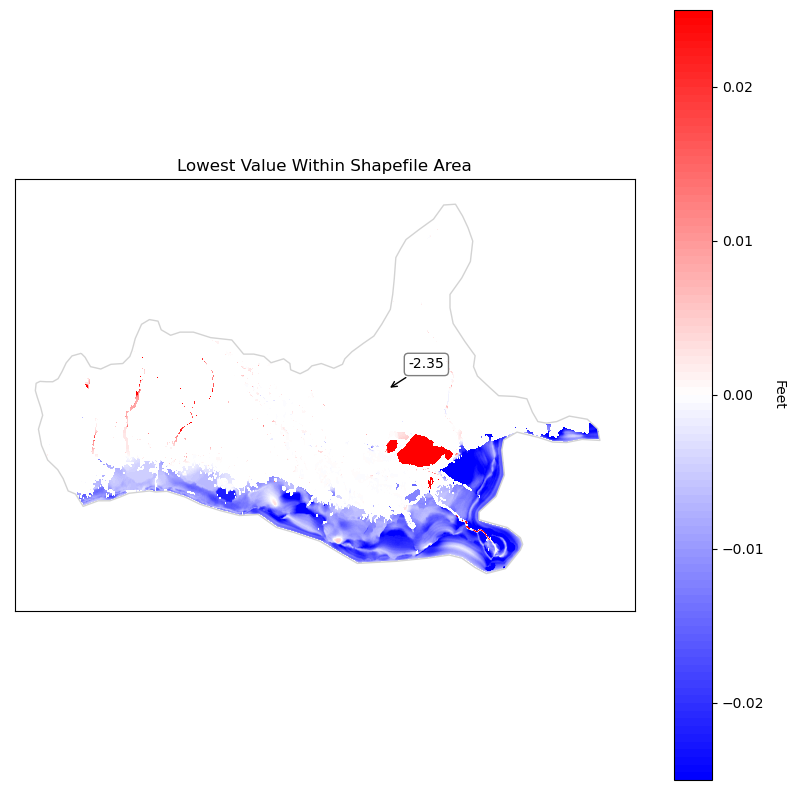

In [11]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# File paths
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the value and index of the lowest pixel that's not nan
min_value = np.nanmin(out_image)
min_index = np.unravel_index(np.nanargmin(out_image), out_image.shape)

# Convert the row, column index of the min value to coordinates
min_coords = rasterio.transform.xy(out_transform, min_index[0], min_index[1], offset='center')

# Round the min value for display with two decimal places
rounded_min_value = "{:.2f}".format(min_value)

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the lowest value
plt.annotate(
    rounded_min_value, 
    xy=min_coords, 
    xycoords='data',
    xytext=(15, 15), 
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->"),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
)

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Lowest Value Within Shapefile Area')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:57: UserWarning: Warning: 'argpartition' will ignore the 'mask' of the MaskedArray.
  return bound(*args, **kwds)


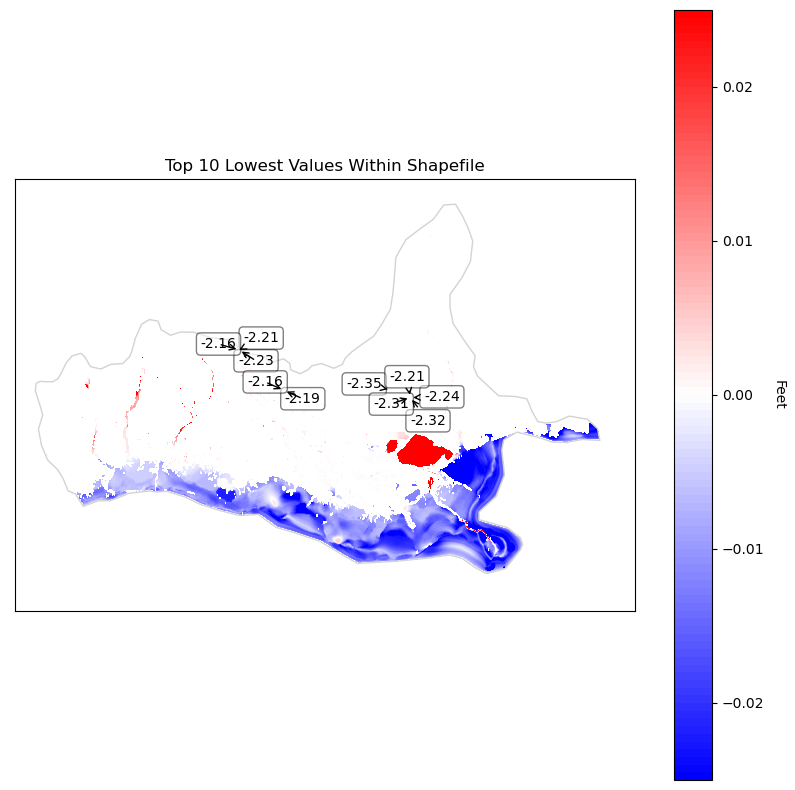

In [12]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# File paths

downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Create a masked array to exclude nan values
masked_array = np.ma.array(out_image, mask=np.isnan(out_image))

# Flatten the array for processing
flat_array = masked_array.flatten()

# Find the indices of the 10 lowest values, excluding masked elements (NaNs)
lowest_indices = np.argpartition(flat_array, 10)[:10]

# Get the actual lowest values
lowest_values = flat_array[lowest_indices]

# Convert the linear indices to 2D indices
row_indices, col_indices = np.unravel_index(lowest_indices, out_image.shape)

# Convert the row, column index of the lowest values to coordinates
coords_lowest10 = [rasterio.transform.xy(out_transform, row, col, offset='center') for row, col in zip(row_indices, col_indices)]

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
fig, ax = plt.subplots(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
img = ax.imshow(masked_array, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=ax, facecolor='none', edgecolor='lightgrey')

# Annotate the 10 lowest values
texts = []
for value, (x, y) in zip(lowest_values, coords_lowest10):
    texts.append(
        ax.text(
            x, y, f"{value:.2f}",
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
        )
    )

# Customize the colorbar
cbar = fig.colorbar(img)
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
ax.set_title('Top 10 Lowest Values Within Shapefile')

# Use adjust_text to prevent overlap
adjust_text(texts, expand_points=(1, 1), arrowprops=dict(arrowstyle="->", color='black'), ax=ax)

# Remove the axis numbers (ticks)
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [28]:
# Print the lowest 10 values and their original coordinates
for i, ((x, y), value) in enumerate(zip(coords_lowest10, lowest_values)):
    print(f"Lowest {i+1}: Value = {value:.2f}, Original Coordinates = (X: {x:.6f}, Y: {y:.6f})")

Lowest 1: Value = -2.32, Original Coordinates = (X: 3619067.978156, Y: 824449.247207)
Lowest 2: Value = -2.35, Original Coordinates = (X: 3531663.507450, Y: 856142.915773)
Lowest 3: Value = -2.31, Original Coordinates = (X: 3618477.407408, Y: 825039.812459)
Lowest 4: Value = -2.24, Original Coordinates = (X: 3619067.978156, Y: 824252.392122)
Lowest 5: Value = -2.23, Original Coordinates = (X: 2962943.877114, Y: 1006737.055235)
Lowest 6: Value = -2.19, Original Coordinates = (X: 3134603.107869, Y: 851812.103919)
Lowest 7: Value = -2.16, Original Coordinates = (X: 3134209.394037, Y: 852402.669172)
Lowest 8: Value = -2.21, Original Coordinates = (X: 2963140.734030, Y: 1006933.910320)
Lowest 9: Value = -2.21, Original Coordinates = (X: 3618871.121240, Y: 824449.247207)
Lowest 10: Value = -2.16, Original Coordinates = (X: 2962747.020198, Y: 1006737.055235)


In [26]:
# Assuming the coordinates need to be converted from EPSG:6479 to WGS84 (EPSG:4326)
transformer = Transformer.from_crs("EPSG:6479", "EPSG:4326", always_xy=True)
coords_lowest10_wgs84 = [transformer.transform(x, y) for x, y in coords_lowest10]

# Print the lowest 10 values and their WGS84 coordinates
for i, ((lon, lat), value) in enumerate(zip(coords_lowest10_wgs84, lowest_values)):
    print(f"Lowest {i+1}: Value = {value:.2f}, Coordinates in WGS84 = (Longitude: {lon:.6f}, Latitude: {lat:.6f})")

Lowest 1: Value = -2.32, Coordinates in WGS84 = (Longitude: -90.256519, Latitude: 30.762642)
Lowest 2: Value = -2.35, Coordinates in WGS84 = (Longitude: -90.534068, Latitude: 30.851738)
Lowest 3: Value = -2.31, Coordinates in WGS84 = (Longitude: -90.258381, Latitude: 30.764280)
Lowest 4: Value = -2.24, Coordinates in WGS84 = (Longitude: -90.256525, Latitude: 30.762100)
Lowest 5: Value = -2.23, Coordinates in WGS84 = (Longitude: -92.350531, Latitude: 31.264231)
Lowest 6: Value = -2.19, Coordinates in WGS84 = (Longitude: -91.799242, Latitude: 30.841420)
Lowest 7: Value = -2.16, Coordinates in WGS84 = (Longitude: -91.800504, Latitude: 30.843039)
Lowest 8: Value = -2.21, Coordinates in WGS84 = (Longitude: -92.349907, Latitude: 31.264777)
Lowest 9: Value = -2.21, Coordinates in WGS84 = (Longitude: -90.257146, Latitude: 30.762647)
Lowest 10: Value = -2.16, Coordinates in WGS84 = (Longitude: -92.351161, Latitude: 31.264226)


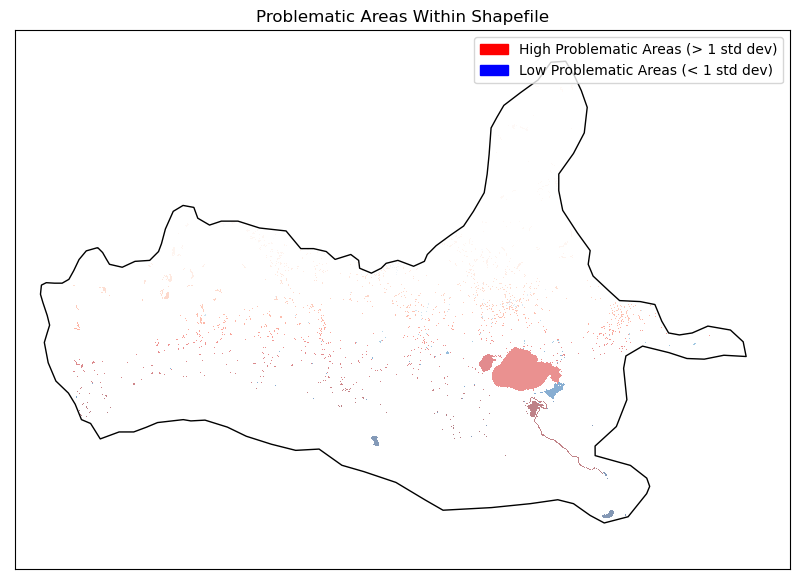

In [13]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata
    if nodata_value is None:
        nodata_value = -9999.0

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Calculate statistics
masked_array = np.ma.masked_invalid(out_image)
mean_value = masked_array.mean()
std_dev = masked_array.std()

# Identify problematic areas
problematic_high = out_image > mean_value + std_dev
problematic_low = out_image < mean_value - std_dev

# Label the clusters
labeled_high, _ = label(problematic_high)
labeled_low, _ = label(problematic_low)

# Plot the raster highlighting problematic areas
fig, ax = plt.subplots(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]

# Prepare masked arrays for display
high_values_display = np.ma.array(labeled_high, mask=labeled_high == 0)
low_values_display = np.ma.array(labeled_low, mask=labeled_low == 0)

# Display high values in red
plt.imshow(high_values_display, cmap='Reds', interpolation='none', extent=raster_extent, alpha=0.5)

# Display low values in blue
plt.imshow(low_values_display, cmap='Blues', interpolation='none', extent=raster_extent, alpha=0.5)

# Overlay the shapefile
shapefile.plot(ax=ax, facecolor='none', edgecolor='black')

# Create custom legend
from matplotlib.patches import Patch
legend_labels = [Patch(facecolor='red', edgecolor='r', label='High Problematic Areas (> 1 std dev)'),
                 Patch(facecolor='blue', edgecolor='b', label='Low Problematic Areas (< 1 std dev)')]
ax.legend(handles=legend_labels, loc='upper right')

# Set the plot title
ax.set_title('Problematic Areas Within Shapefile')

# Remove axis numbers (ticks)
ax.set_xticks([])
ax.set_yticks([])

plt.show()


Mean value: 0.0011660822812130014
Standard Deviation: 0.04138442729189011
Minimum value: -2.3501973152160645
Maximum value: 4.074807643890381


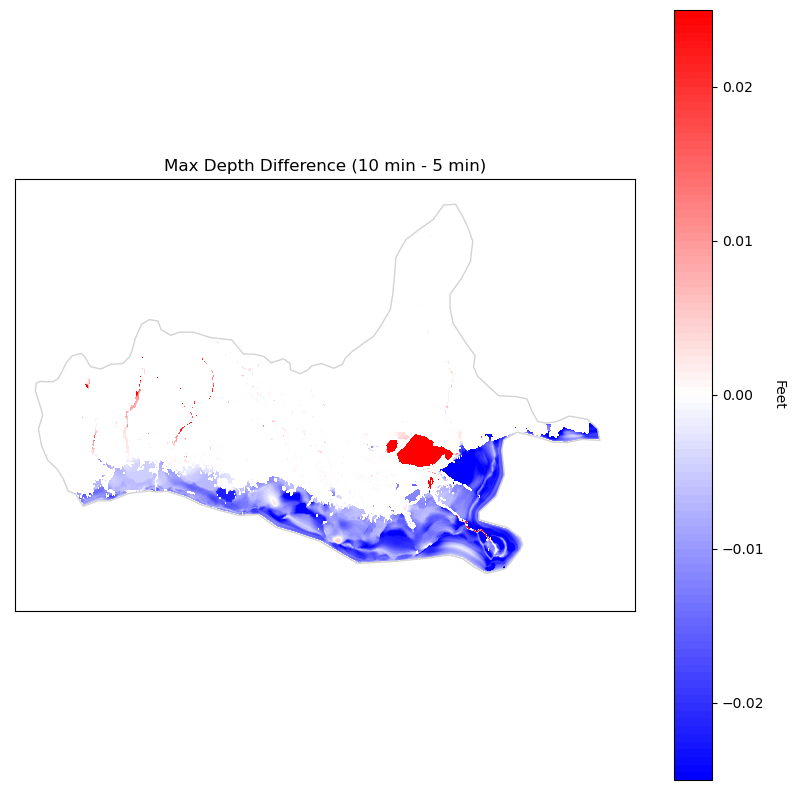

In [15]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

masked_array = np.ma.masked_invalid(out_image)
mean_value = np.ma.mean(masked_array)
std_dev = np.ma.std(masked_array)
min_value = np.ma.min(masked_array)
max_value = np.ma.max(masked_array)

print(f"Mean value: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (10 min - 5 min)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


Mean value: 0.0011660822812130014
Standard Deviation: 0.04138442729189011
Minimum value: -2.3501973152160645
Maximum value: 4.074807643890381


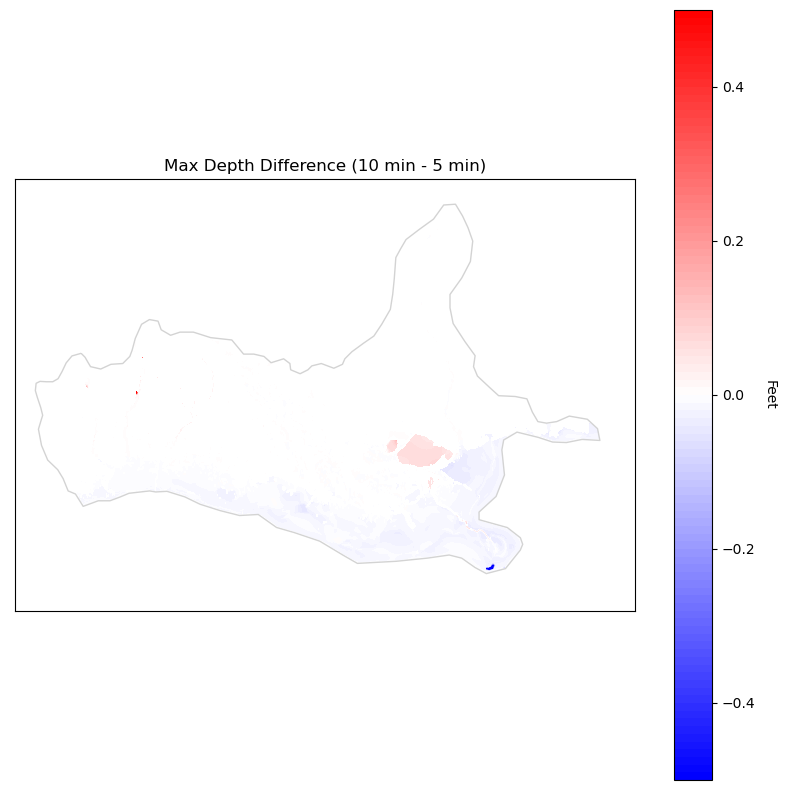

In [16]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np


downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

masked_array = np.ma.masked_invalid(out_image)
mean_value = np.ma.mean(masked_array)
std_dev = np.ma.std(masked_array)
min_value = np.ma.min(masked_array)
max_value = np.ma.max(masked_array)

print(f"Mean value: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Minimum value: {min_value}")
print(f"Maximum value: {max_value}")

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.5, vmax=0.5)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (10 min - 5 min)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


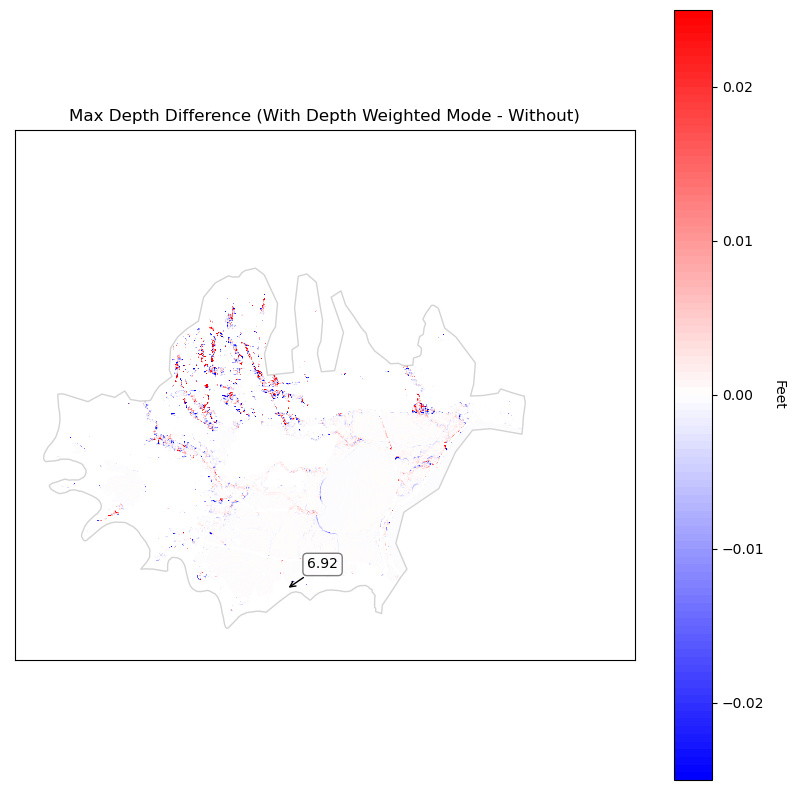

In [4]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# File paths

downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the value and index of the highest pixel
max_value = np.nanmax(out_image)
max_index = np.unravel_index(np.nanargmax(out_image), out_image.shape)

# Convert the row, column index of the max value to coordinates
max_coords = rasterio.transform.xy(out_transform, max_index[0], max_index[1], offset='center')

# Round the max value for display with two decimal places
rounded_max_value = "{:.2f}".format(max_value)

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the maximum value
plt.annotate(rounded_max_value, 
             xy=max_coords, 
             xycoords='data',
             xytext=(15, 15), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->"),
             bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5))

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Max Depth Difference (With Depth Weighted Mode - Without)')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


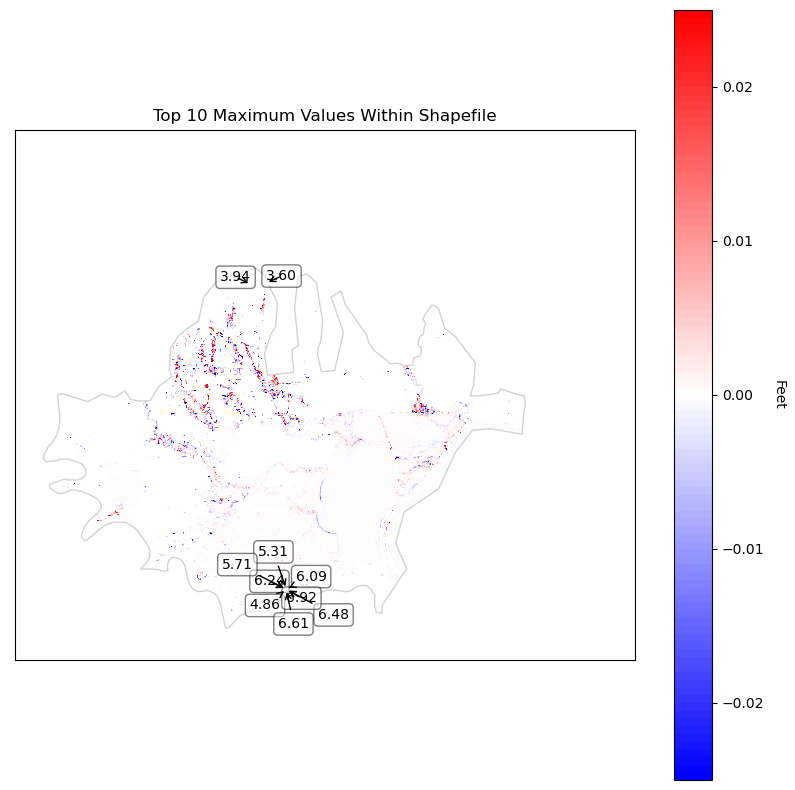

In [5]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# File paths
file_path = r"S:\For_Angshuman\LWI_Test\Aug2016wwo.tif"
shapefile_path = r"S:\For_Angshuman\LWI_Test\Amite_HECRAS_2DDomain.shp"
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the indices of all finite values inside the shapefile boundary
finite_indices = np.argwhere(np.isfinite(out_image))

# Get the corresponding values
finite_values = out_image[finite_indices[:, 0], finite_indices[:, 1]]

# Find the top 10 values and their indices
top_indices = np.argpartition(finite_values, -10)[-10:]
top_values = finite_values[top_indices]
top_finite_indices = finite_indices[top_indices]

# Convert 2D indices to coordinates
coords_top10 = [rasterio.transform.xy(out_transform, *idx, offset='center') for idx in top_finite_indices]

# Create a custom colormap
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the top 10 values
texts = []
for value, (x, y) in zip(top_values, coords_top10):
    texts.append(
        plt.text(
            x, y, f"{value:.2f}",
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
        )
    )

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Top 10 Maximum Values Within Shapefile')

# Use adjust_text to prevent overlap
adjust_text(texts, expand_points=(1, 1), arrowprops=dict(arrowstyle="->", color='black'), ax=plt.gca())

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


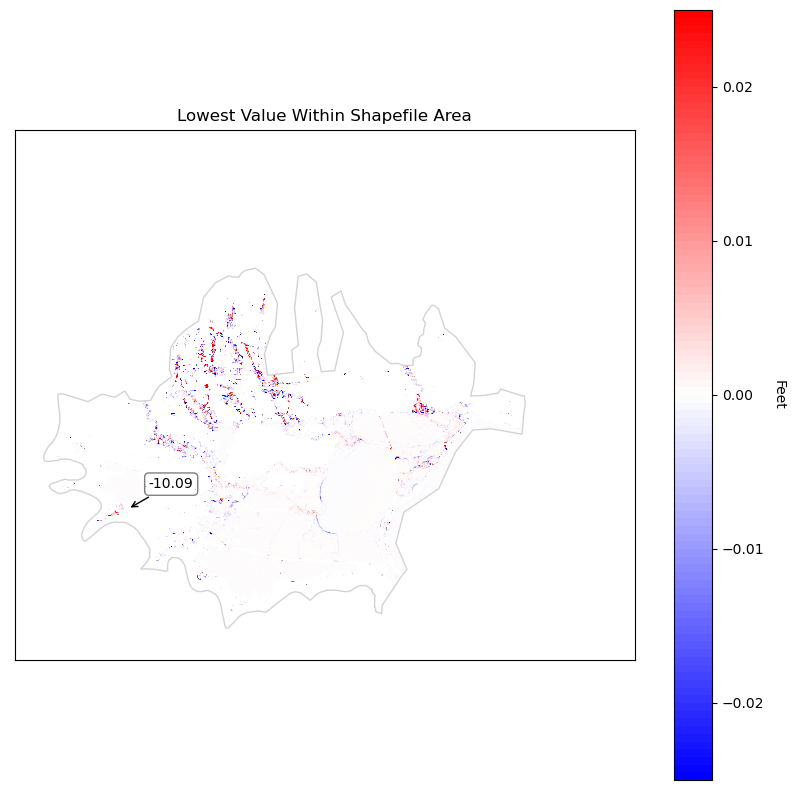

In [6]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_path = r"S:\For_Angshuman\LWI_Test\Aug2016wwo.tif"
shapefile_path = r"S:\For_Angshuman\LWI_Test\Amite_HECRAS_2DDomain.shp"
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor
    
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )
    
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )
    
    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )
    
    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Find the value and index of the lowest pixel that's not nan
min_value = np.nanmin(out_image)
min_index = np.unravel_index(np.nanargmin(out_image), out_image.shape)

# Convert the row, column index of the min value to coordinates
min_coords = rasterio.transform.xy(out_transform, min_index[0], min_index[1], offset='center')

# Round the min value for display with two decimal places
rounded_min_value = "{:.2f}".format(min_value)

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
plt.figure(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
plt.imshow(out_image, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=plt.gca(), facecolor='none', edgecolor='lightgrey')

# Annotate the lowest value
plt.annotate(
    rounded_min_value, 
    xy=min_coords, 
    xycoords='data',
    xytext=(15, 15), 
    textcoords='offset points',
    arrowprops=dict(arrowstyle="->"),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
)

# Customize the colorbar
cbar = plt.colorbar()
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
plt.title('Lowest Value Within Shapefile Area')

# Remove the axis numbers (ticks)
plt.xticks([])
plt.yticks([])

plt.show()


C:\Users\asaharia\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:57: UserWarning: Warning: 'argpartition' will ignore the 'mask' of the MaskedArray.
  return bound(*args, **kwds)


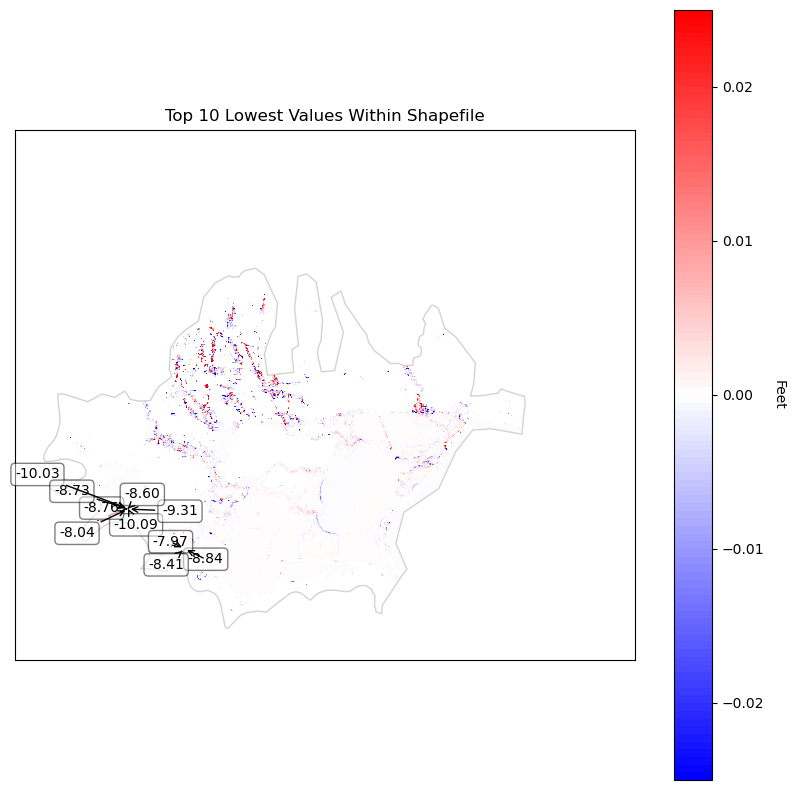

In [7]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# File paths
file_path = r"S:\For_Angshuman\LWI_Test\Aug2016wwo.tif"
shapefile_path = r"S:\For_Angshuman\LWI_Test\Amite_HECRAS_2DDomain.shp"
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata  # Get the nodata value from the source raster
    if nodata_value is None:
        nodata_value = -9999.0  # Define an appropriate nodata value based on your data type

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Create a masked array to exclude nan values
masked_array = np.ma.array(out_image, mask=np.isnan(out_image))

# Flatten the array for processing
flat_array = masked_array.flatten()

# Find the indices of the 10 lowest values, excluding masked elements (NaNs)
lowest_indices = np.argpartition(flat_array, 10)[:10]

# Get the actual lowest values
lowest_values = flat_array[lowest_indices]

# Convert the linear indices to 2D indices
row_indices, col_indices = np.unravel_index(lowest_indices, out_image.shape)

# Convert the row, column index of the lowest values to coordinates
coords_lowest10 = [rasterio.transform.xy(out_transform, row, col, offset='center') for row, col in zip(row_indices, col_indices)]

# Create a custom colormap (Blue-White-Red reversed)
colors = ['blue', 'white', 'red']
n_bins = 100
cmap_name = 'my_rwb_r'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Plot the raster
fig, ax = plt.subplots(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]
img = ax.imshow(masked_array, cmap=cm, extent=raster_extent, vmin=-0.025, vmax=0.025)

# Overlay the shapefile
shapefile.plot(ax=ax, facecolor='none', edgecolor='lightgrey')

# Annotate the 10 lowest values
texts = []
for value, (x, y) in zip(lowest_values, coords_lowest10):
    texts.append(
        ax.text(
            x, y, f"{value:.2f}",
            ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white', alpha=0.5)
        )
    )

# Customize the colorbar
cbar = fig.colorbar(img)
cbar.set_label('Feet', rotation=270, labelpad=15)

# Set the plot title
ax.set_title('Top 10 Lowest Values Within Shapefile')

# Use adjust_text to prevent overlap
adjust_text(texts, expand_points=(1, 1), arrowprops=dict(arrowstyle="->", color='black'), ax=ax)

# Remove the axis numbers (ticks)
ax.set_xticks([])
ax.set_yticks([])

plt.show()


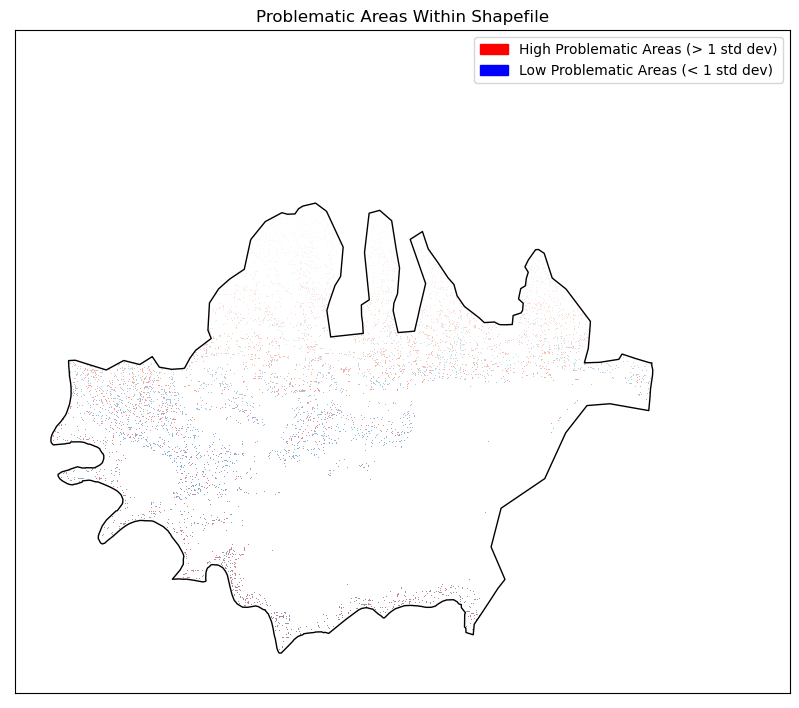

In [8]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from rasterio.enums import Resampling
from rasterio.io import MemoryFile
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label

# File paths
file_path = r"S:\For_Angshuman\LWI_Test\Aug2016wwo.tif"
shapefile_path = r"S:\For_Angshuman\LWI_Test\Amite_HECRAS_2DDomain.shp"
downsample_factor = 10

# Read the shapefile
shapefile = gpd.read_file(shapefile_path)

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata
    if nodata_value is None:
        nodata_value = -9999.0

    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    with MemoryFile() as memfile:
        with memfile.open(
            driver=src.driver,
            height=new_height,
            width=new_width,
            count=src.count,
            dtype=src.dtypes[0],
            crs=src.crs,
            transform=transform
        ) as vrt:
            vrt.write(data)
            shapes = [feature["geometry"] for feature in shapefile.to_dict('records')]
            out_image, out_transform = mask(
                vrt,
                shapes,
                all_touched=True,
                nodata=nodata_value,
                invert=False
            )

    out_image = out_image.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Calculate statistics
masked_array = np.ma.masked_invalid(out_image)
mean_value = masked_array.mean()
std_dev = masked_array.std()

# Identify problematic areas
problematic_high = out_image > mean_value + std_dev
problematic_low = out_image < mean_value - std_dev

# Label the clusters
labeled_high, _ = label(problematic_high)
labeled_low, _ = label(problematic_low)

# Plot the raster highlighting problematic areas
fig, ax = plt.subplots(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]

# Prepare masked arrays for display
high_values_display = np.ma.array(labeled_high, mask=labeled_high == 0)
low_values_display = np.ma.array(labeled_low, mask=labeled_low == 0)

# Display high values in red
plt.imshow(high_values_display, cmap='Reds', interpolation='none', extent=raster_extent, alpha=0.5)

# Display low values in blue
plt.imshow(low_values_display, cmap='Blues', interpolation='none', extent=raster_extent, alpha=0.5)

# Overlay the shapefile
shapefile.plot(ax=ax, facecolor='none', edgecolor='black')

# Create custom legend
from matplotlib.patches import Patch
legend_labels = [Patch(facecolor='red', edgecolor='r', label='High Problematic Areas (> 1 std dev)'),
                 Patch(facecolor='blue', edgecolor='b', label='Low Problematic Areas (< 1 std dev)')]
ax.legend(handles=legend_labels, loc='upper right')

# Set the plot title
ax.set_title('Problematic Areas Within Shapefile')

# Remove axis numbers (ticks)
ax.set_xticks([])
ax.set_yticks([])

plt.show()


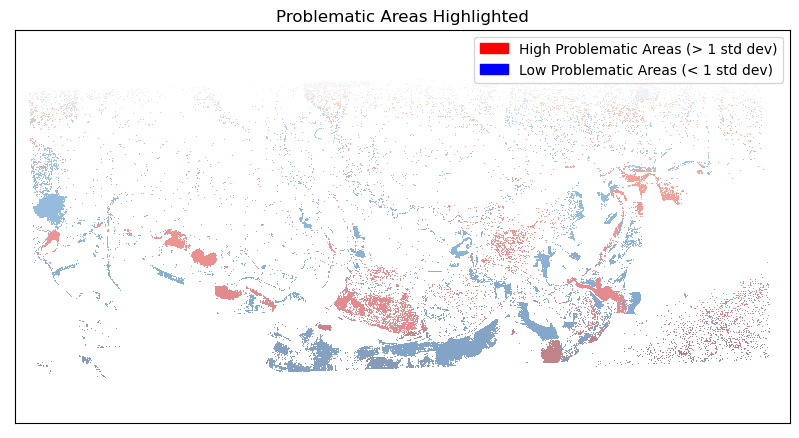

In [17]:
import rasterio
from rasterio.enums import Resampling
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import label

# File path for the raster file (make sure to change this to your local path)
file_path = r"Z:\\LWI2023-24\\LWI_coastwide_terrain\\Cpra-Slamm.tif"
downsample_factor = 10  # Adjust if needed

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata
    if nodata_value is None:
        nodata_value = -9999.0

    # Downsampling the data for processing
    new_width = src.width // downsample_factor
    new_height = src.height // downsample_factor

    # Reading the data with the downsampled shape
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    # Adjusting the transform for the downsampled data
    transform = src.transform * src.transform.scale(
        (src.width / data.shape[-1]),
        (src.height / data.shape[-2])
    )

    # Squeezing the array to remove the first dimension if it's 1
    out_image = data.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Calculate statistics for identifying problematic areas
masked_array = np.ma.masked_invalid(out_image)
mean_value = masked_array.mean()
std_dev = masked_array.std()

# Identify problematic areas based on the standard deviation
problematic_high = out_image > mean_value + std_dev
problematic_low = out_image < mean_value - std_dev

# Label the clusters of problematic areas
labeled_high, _ = label(problematic_high)
labeled_low, _ = label(problematic_low)

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 10))
raster_extent = [transform[2], transform[2] + transform[0] * new_width, transform[5] + transform[4] * new_height, transform[5]]

# Prepare masked arrays for display
high_values_display = np.ma.array(labeled_high, mask=labeled_high == 0)
low_values_display = np.ma.array(labeled_low, mask=labeled_low == 0)

# Display high problematic areas in red
plt.imshow(high_values_display, cmap='Reds', interpolation='none', extent=raster_extent, alpha=0.5)

# Display low problematic areas in blue
plt.imshow(low_values_display, cmap='Blues', interpolation='none', extent=raster_extent, alpha=0.5)

# Create custom legend for the plot
from matplotlib.patches import Patch
legend_labels = [Patch(facecolor='red', edgecolor='r', label='High Problematic Areas (> 1 std dev)'),
                 Patch(facecolor='blue', edgecolor='b', label='Low Problematic Areas (< 1 std dev)')]
ax.legend(handles=legend_labels, loc='upper right')

# Set the plot title and remove axis numbers (ticks)
ax.set_title('Problematic Areas Highlighted')
ax.set_xticks([])
ax.set_yticks([])

# Display the plot
plt.show()


In [24]:
import rasterio
from rasterio.enums import Resampling
import numpy as np

# Replace this with the path to your raster file
file_path = r"Z:\\LWI2023-24\\LWI_coastwide_terrain\\Cpra-Slamm.tif"

# Open the raster file
with rasterio.open(file_path) as src:
    nodata_value = src.nodata
    if nodata_value is None:
        nodata_value = -9999.0

    # Downsampling the data for processing
    new_width = src.width // 10
    new_height = src.height // 10

    # Reading the data with the downsampled shape
    data = src.read(
        out_shape=(src.count, new_height, new_width),
        resampling=Resampling.average
    )

    # Squeezing the array to remove the first dimension if it's 1
    out_image = data.squeeze()
    out_image = out_image.astype('float')
    out_image[out_image == nodata_value] = np.nan

# Calculate the total number of valid (non-NaN) pixels
total_valid_pixels = np.count_nonzero(~np.isnan(out_image))

# Initialize a dictionary to hold the area percentages for different ranges
area_percentages = {}

# Define the ranges
ranges = [1, 2, 3, 4, 5]

# Calculate area percentage for each range
for r in ranges:
    # Create a mask for values within the range [-r, r]
    mask = (out_image >= -r) & (out_image <= r)
    # Count the number of pixels within the range
    count_within_range = np.count_nonzero(mask)
    # Calculate the percentage of the area within the range
    area_percentages[f'{-r} to {r}'] = (count_within_range / total_valid_pixels) * 100

# Output the results
for range, percentage in area_percentages.items():
    print(f"Area within range {range} feet: {percentage:.2f}%")


Area within range -1 to 1 feet: 73.76%
Area within range -2 to 2 feet: 87.21%
Area within range -3 to 3 feet: 92.81%
Area within range -4 to 4 feet: 95.77%
Area within range -5 to 5 feet: 97.40%


Perform the analysis to find areas where the value is significantly higher than a defined threshold.

## Step 4: Plotting the Results

Visualize the results to see the locations with high values.

## Step 5: Saving the Results

Save the results of the analysis, either as a new raster file or as a text file with the indices of high values.